# Project Part 2
**Group #3**

*Audrey Kuo, Alec Brown, Bella Rogers, Jendayia Taylor, Matthew Lei, Miller Devane, Ramnath Gandhi, Matthew Congiusta*

- IF Models (Integrate and Fire)
    - Type of mathematical model that represents how neurons respond to stimuli
    - Simplifies neuronal dynamics and spiking behavior
    - Inputs are integrated and the neuron spikes if a threshold is reached
    - Involves linear increase of membrane potential based on injected current until threshold is reached
    - Output is represented in binary: 0 corresponds to no action potential and 1 corresponds to an action potential
    - Does not incorporate leaky ion channels

[GitHub Repository Link](https://github.com/kuo-audrey/NEUR-3002)


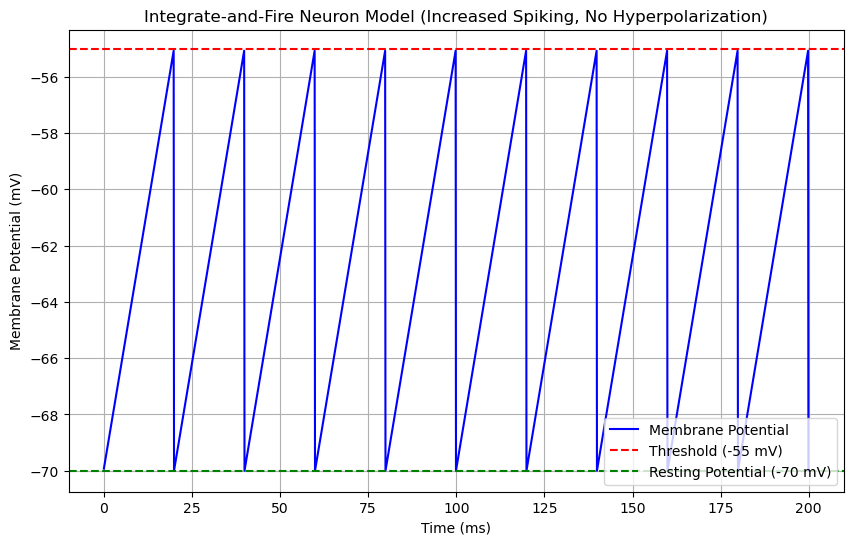

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 200  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = resting_potential  # reset potential set to resting potential
linear_increase_rate = 0.5  # increased linear increase rate (mV/ms per µA of current)

# Input current (constant for simplicity)
input_current = 1.5  # input current (µA)

# Initialize variables
membrane_potential = resting_potential
potential_trace = []

for t in time:
    # Update membrane potential linearly based on input current
    membrane_potential += linear_increase_rate * input_current * dt

    # Check for spike
    if membrane_potential >= threshold_potential:
        membrane_potential = reset_potential  # Reset to resting potential

    # Record potential
    potential_trace.append(membrane_potential)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, potential_trace, label="Membrane Potential", color="blue")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")

plt.title("Integrate-and-Fire Neuron Model (Increased Spiking, No Hyperpolarization)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()
plt.show()

Based on the above visualization and prior knowledge of leaky integrate and fire models, the aspect of this model that is most unlike a real biological neuron is the linear increase in membrane potential in response to injected current. The essential missing aspect from the above integrate-and-fire neuron model is the presence of leaky ion channels. The aspects that are like biological neurons are the integration of input and the firing of an action potential once threshold is reached. The model also incorporates the phase of hyperpolarization immediately after a spike, during which the neuron cannot fire another actional potential.

The most challenging aspect of this homework was correcting the code in order to ensure that the increase in membrane potential did in fact increase linearly to accurately represent a neuronal IF model. Another difficult aspect of the assignment was analyzing the associated visualization to pinpoint strengths and limitations of the IF model in representing a biological neuron.

I would estimate that this project took around 20 minutes to complete.

# Project Part 3

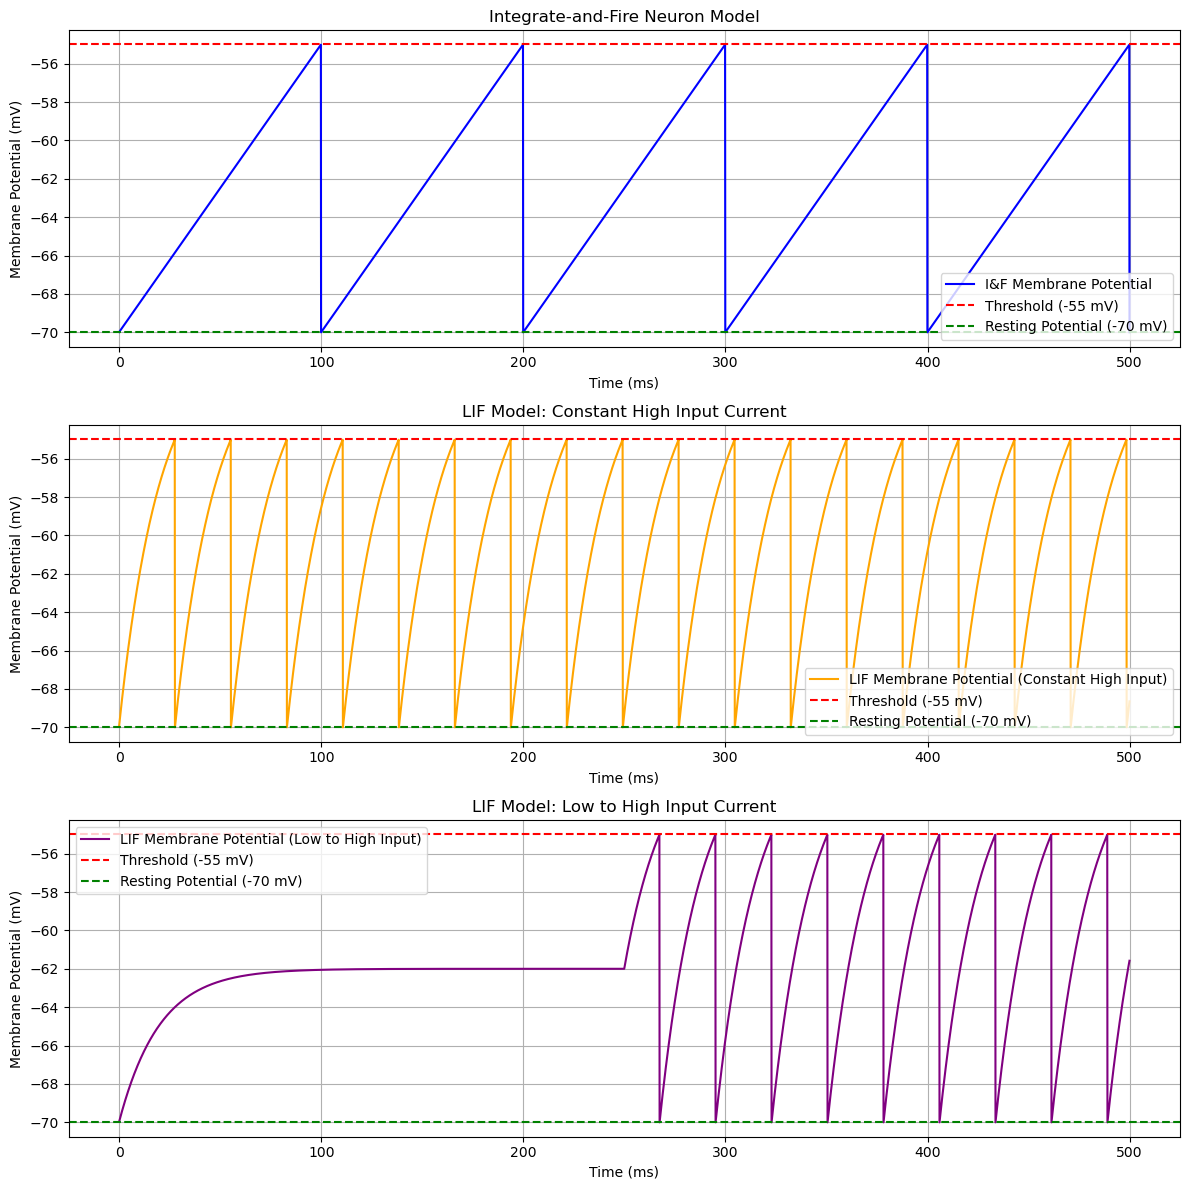

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 500  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = -75  # reset potential (mV)
linear_increase_rate = 0.1  # linear increase rate (mV/ms per µA of current)

# LIF Model Parameters
tau = 20  # membrane time constant (ms)
resistance = 10  # membrane resistance (MΩ)

# Input currents
input_current_IF = 1.5  # constant input current for I&F model (µA)
input_current_LIF_1 = 0.8  # low input current for first half of LIF model (µA)
input_current_LIF_2 = 2.0  # higher input current for second half of LIF model (µA)
input_current_LIF_3 = 2.0  # constant high input current for the entire LIF model (µA)

# Initialize variables for I&F model
membrane_potential_IF = resting_potential
potential_trace_IF = []

# Initialize variables for LIF model
membrane_potential_LIF_1 = resting_potential
membrane_potential_LIF_2 = resting_potential
membrane_potential_LIF_3 = resting_potential
potential_trace_LIF_1 = []
potential_trace_LIF_2 = []
potential_trace_LIF_3 = []

# Simulation loop
for t in time:
    # --- I&F Model --- #
    membrane_potential_IF += linear_increase_rate * input_current_IF * dt

    # Check for spike in I&F model
    if membrane_potential_IF >= threshold_potential:
        membrane_potential_IF = reset_potential

    # Ensure the potential does not go below the resting potential
    if membrane_potential_IF < resting_potential:
        membrane_potential_IF = resting_potential

    potential_trace_IF.append(membrane_potential_IF)

    # --- LIF Model 1 (Low to High Input) --- #
    if t < total_time / 2:
        input_current_LIF = input_current_LIF_1  # Low current
    else:
        input_current_LIF = input_current_LIF_2  # Higher current

    membrane_potential_LIF_1 += (resting_potential - membrane_potential_LIF_1 + input_current_LIF * resistance) * dt / tau

    if membrane_potential_LIF_1 >= threshold_potential:
        membrane_potential_LIF_1 = reset_potential

    # Ensure the potential does not go below the resting potential
    if membrane_potential_LIF_1 < resting_potential:
        membrane_potential_LIF_1 = resting_potential

    potential_trace_LIF_1.append(membrane_potential_LIF_1)

    # --- LIF Model 2 (Constant High Input) --- #
    membrane_potential_LIF_2 += (resting_potential - membrane_potential_LIF_2 + input_current_LIF_3 * resistance) * dt / tau

    if membrane_potential_LIF_2 >= threshold_potential:
        membrane_potential_LIF_2 = reset_potential

    # Ensure the potential does not go below the resting potential
    if membrane_potential_LIF_2 < resting_potential:
        membrane_potential_LIF_2 = resting_potential

    potential_trace_LIF_2.append(membrane_potential_LIF_2)

    # --- LIF Model 3 (Constant High Input, Same as LIF Model 2) --- #
    membrane_potential_LIF_3 += (resting_potential - membrane_potential_LIF_3 + input_current_LIF_3 * resistance) * dt / tau

    if membrane_potential_LIF_3 >= threshold_potential:
        membrane_potential_LIF_3 = reset_potential

    # Ensure the potential does not go below the resting potential
    if membrane_potential_LIF_3 < resting_potential:
        membrane_potential_LIF_3 = resting_potential

    potential_trace_LIF_3.append(membrane_potential_LIF_3)

# Plot results
plt.figure(figsize=(12, 12))

# Plot for I&F Model
plt.subplot(3, 1, 1)
plt.plot(time, potential_trace_IF, label="I&F Membrane Potential", color="blue")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")
plt.title("Integrate-and-Fire Neuron Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()

# Plot for LIF Model with Constant High Input
plt.subplot(3, 1, 2)
plt.plot(time, potential_trace_LIF_2, label="LIF Membrane Potential (Constant High Input)", color="orange")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")
plt.title("LIF Model: Constant High Input Current")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()

# Plot for LIF Model with Low-to-High Input
plt.subplot(3, 1, 3)
plt.plot(time, potential_trace_LIF_1, label="LIF Membrane Potential (Low to High Input)", color="purple")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")
plt.title("LIF Model: Low to High Input Current")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

- Information theory within applied mathematics studies how information can be quantified, stored, and communicated, with signals typically disregarding context/meaning. A bit (“binary digit”) is a unit of measuring the amount of information (e.g. binary answers) needed to determine an answer to a single question: 1 bit represents the amount of information needed to distinguish between two equally likely outcomes. Shannon’s entropy allows for comparison of amounts of information and is the amount of uncertainty or randomness involved in the value of a variable or process. It is a useful equation to establish coding efficiency: more entropy means more uncertainty and more bits required to distinguish an answer. The HH model contains the most bits because it is the most complex model and the least predictable. It uses nonlinear equations and encodes membrane and ion channels, including leaky ion channels. The HH model also has the highest Shannon’s entropy because it is the most biologically accurate (models ion channels explicitly), takes in the most parameters, and involves continuous equations and more variability.

- We were able to visualize code between our group using the ReadMe submission option in GitHub and successively submitted via GitHub, but sometimes it was difficult to upload parts of code or the project. We shared work over text and documents and were able to transfer over to GitHub. It is new to many of us but interesting and helpful software.